<a href="https://colab.research.google.com/github/CorleoneAppolonia/PMP-2024/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hmmlearn

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
import networkx as nx


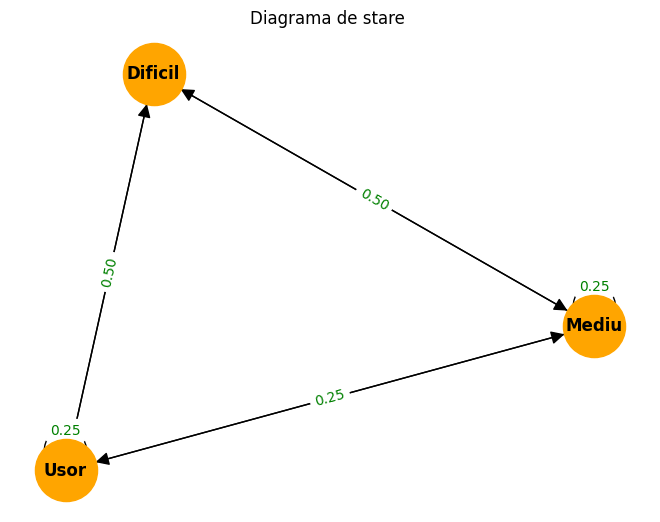

In [19]:

states = ["Dificil", "Mediu", "Usor"]
n_states = len(states)

# Define the observation space
observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)

# Define the initial state distribution
state_probability = np.array([1/3, 1/3, 1/3])

# Define the state transition probabilities
transition_probability = np.array([[0, 0.5, 0.5],
                                   [0.5, 0.25, 0.25],
                                   [0.5, 0.25, 0.25]])

# Define the observation likelihoods
emission_probability= np.array([[0.1, 0.2, 0.4, 0.3],
                                [0.15, 0.25, 0.5, 0.1],
                                [0.2, 0.3, 0.4, 0.1]])
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability


G = nx.DiGraph()

for i, state in enumerate(states):
    G.add_node(state)

for i, state_from in enumerate(states):
    for j, state_to in enumerate(states):
        prob = transition_probability[i, j]
        if prob > 0:
            G.add_edge(state_from, state_to, label=f'{prob:.2f}')


pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_size=2000, node_color='orange', font_size=12, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=10)

plt.title('Diagrama de stare ')
plt.show()

In [15]:
observations_sequence = np.array([0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]).reshape(-1, 1)
observations_sequence
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

Most likely hidden states: [2 2 0 2 0 1 0 2 0 2 0 1]
